In [29]:
import os
import re
from collections import defaultdict
import matplotlib.pyplot as plt

In [30]:
root_path = os.path.normpath(os.getcwd() + os.sep + os.pardir)
data_path = os.path.join(root_path, "data")

In [37]:
experiments = os.listdir(data_path)
print(experiments)

['.DS_Store', 'logreg', 'log_linear_backward_directives', 'backward_pipeline_directives', 'addition_bmm', 'bert', 'abs', 'Samba-GEMM']


In [32]:
log_file_name = "jit-perf-v0.1.log"
pattern = re.compile(r'\[JITPerf\]')

In [33]:
def format_key(mapper, key):
    fmt = key
    if key in mapper.keys():
        fmt = key + '-' + mapper

In [61]:
def parse_data(exp):
    log_path = os.path.join(os.path.join(data_path, exp), log_file_name)
    with open(log_path) as f:
        lines = f.readlines()
        jit_perf_lines = [line for line in lines if re.match(pattern, line)]
        data = {line.split(' ')[1]: 0 for idx, line in enumerate(jit_perf_lines) }
        dist = {line.split(' ')[1]: data[line.split(' ')[1]] + float(line.split(' ')[2]) for idx, line in enumerate(jit_perf_lines) }
        timeline = {line.split(' ')[1] + '-' + str(idx): float(line.split(' ')[2]) for idx, line in enumerate(jit_perf_lines) }

    return dist, timeline

In [212]:
def _bar_chart(data):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    langs = data.keys()
    students = data.values()
    ax.set(title="Runtime Distribution (sum)")
    ax.bar(langs,students)
    plt.xticks(rotation=90)
    plt.show()

In [375]:
def _timeline_chart(data):
    import matplotlib.pyplot as plt
    import numpy as np
    from datetime import datetime
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    
    names = [key.split('-')[0] if data[key] > 1e7 else '' for key in data.keys()]
    dates = [int(key.split('-')[1]) for key in data.keys()]    
    
    # Choose some nice levels
    levels = data.values()
#     levels = np.tile([-5, 5, -3, 3, -1, 1],
#                  int(np.ceil(len(dates)/6)))[:len(dates)]

    # Create figure and plot a stem plot with the date
    fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
    ax.set(title="Event timeline")

    ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
    ax.plot(dates, np.zeros_like(dates), "-",
            color="k", markerfacecolor="w")  # Baseline and markers on it.

    # annotate lines
    for d, l, r in zip(dates, levels, names):
        ax.annotate(r, xy=(d, l),
                    xytext=(d, 0), textcoords="offset points",
                    horizontalalignment="right",
                    verticalalignment="top" if l > 0 else "top")

    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter('{x:.0f}')
#     ax.xaxis.set_minor_locator(MultipleLocator(5))
#     plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    # remove y axis and spines
    ax.yaxis.set_visible(False)
    ax.spines[["left", "top", "right"]].set_visible(False)

    ax.margins(y=0.1)
    plt.xticks(rotation=90)
    plt.show()

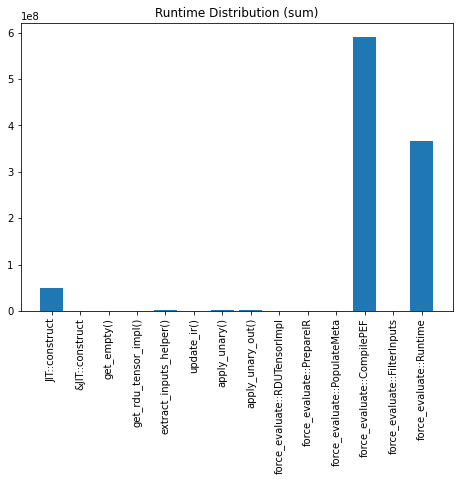

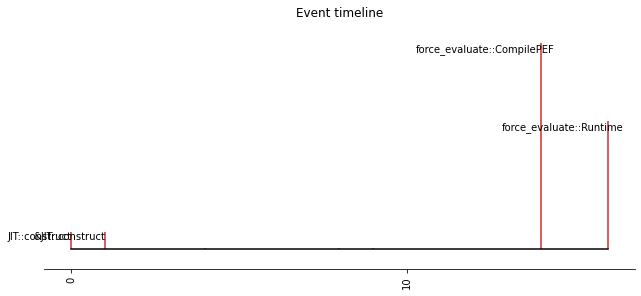

In [376]:
dist, timeline = parse_data("abs")
_bar_chart(dist)
_timeline_chart(timeline)

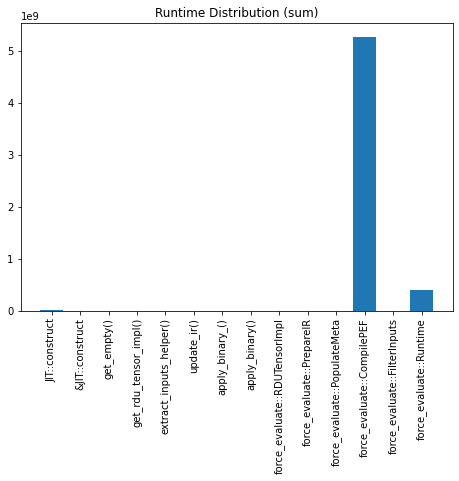

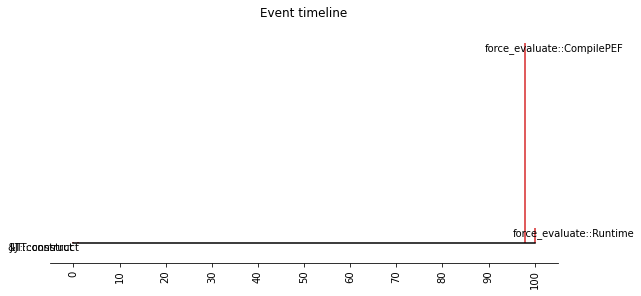

In [349]:
dist, timeline = parse_data("addition_bmm")
_bar_chart(dist)
_timeline_chart(timeline)

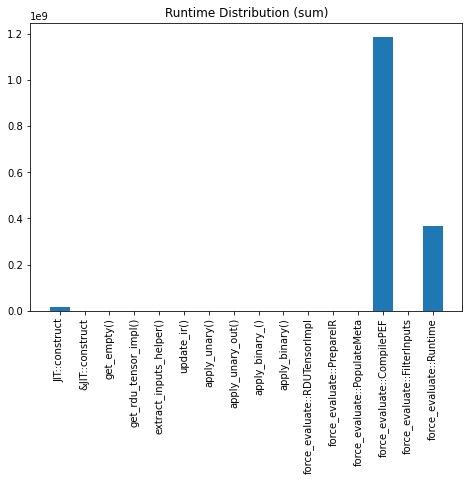

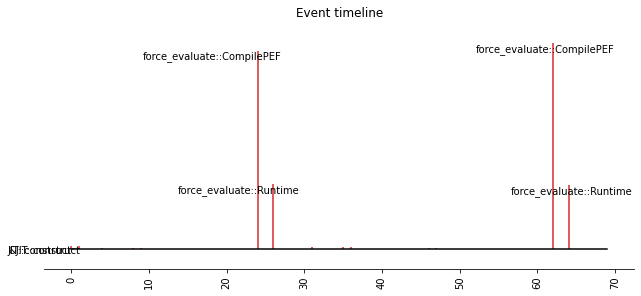

In [350]:
dist, timeline = parse_data("log_linear_backward_directives")
_bar_chart(dist)
_timeline_chart(timeline)

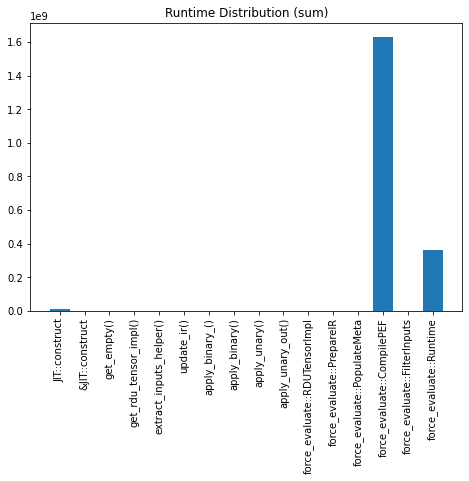

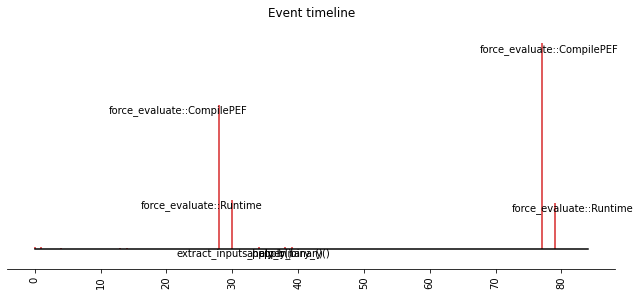

In [351]:
dist, timeline = parse_data("backward_pipeline_directives")
_bar_chart(dist)
_timeline_chart(timeline) 

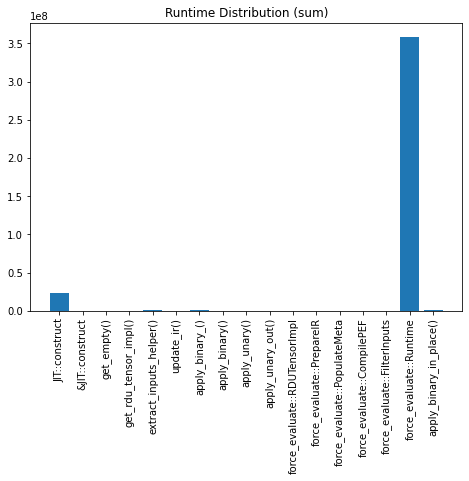

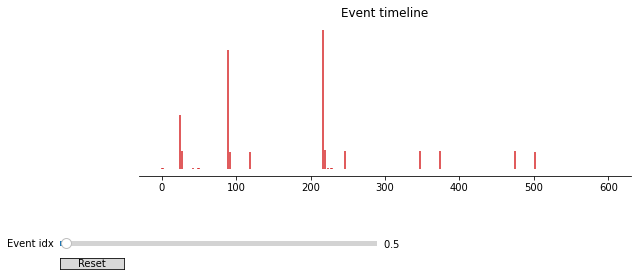

In [384]:
dist, timeline = parse_data("logreg")
_bar_chart(dist)
_timeline_chart_w_scroll(timeline)

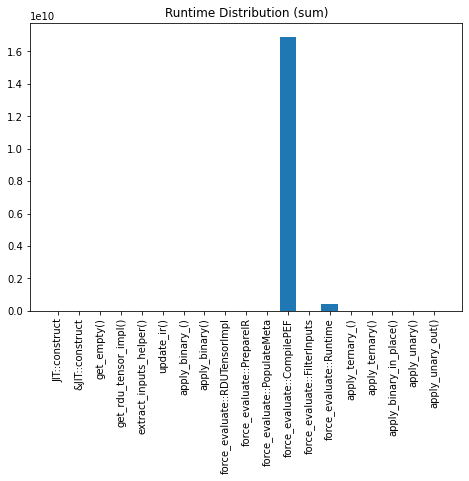

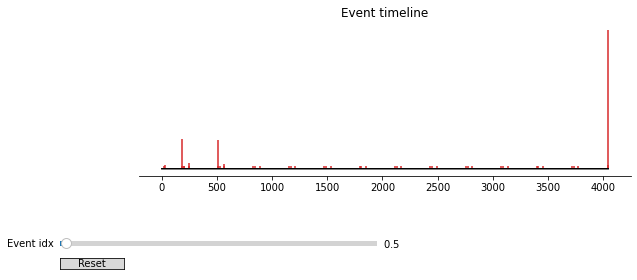

In [392]:
dist, timeline = parse_data("bert")
_bar_chart(dist)
_timeline_chart_w_scroll(timeline)

In [347]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

matplotlib.use('TkAgg')

# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = plt.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = plt.axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()

ModuleNotFoundError: No module named '_tkinter'

In [391]:
def _timeline_chart_w_scroll(data):
    import matplotlib.pyplot as plt
    import numpy as np
    from datetime import datetime
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    from matplotlib.widgets import Slider, Button

    names = [key.split('-')[0] if data[key] > 1e7 else '' for key in data.keys()]
    dates = [int(key.split('-')[1]) for key in data.keys()]    
    levels = data.values()

    # Create figure and plot a stem plot with the date
    fig, ax = plt.subplots(figsize=(8.8, 4))
    plt.subplots_adjust(bottom=0.35)

    ax.set(title="Event timeline")

    ax.vlines(dates, 10, levels, color="tab:red")  # The vertical stems.
            
    axcolor = 'lightgoldenrodyellow'
    axpos = plt.axes([0, 0.1, 0.5, 0.03], facecolor=axcolor)
    spos = Slider(axpos, 'Event idx', 0, 30)

    def update(val):
        pos = spos.val
        print(pos)
        ax.axis([pos,pos+10,-1,1])
        fig.canvas.draw_idle()

    spos.on_changed(update)
    
    def reset(event):
        spos.reset()
        
    resetax = plt.axes([0, 0.025, 0.1, 0.04])
    button = Button(resetax, 'Reset', hovercolor='0.5')
    button.on_clicked(reset)

    
#     ax.plot(dates, np.zeros_like(dates), "-",
# #             color="k", markerfacecolor="w")  # Baseline and markers on it.

#     # annotate lines
#     for d, l, r in zip(dates, levels, names):
#         ax.annotate(r, xy=(d, l),
#                     xytext=(d, 0), textcoords="offset points",
#                     horizontalalignment="right",
#                     verticalalignment="top" if l > 0 else "top")

    # remove y axis and spines
    ax.yaxis.set_visible(False)
    ax.spines[["left", "top", "right"]].set_visible(False)

#     ax.margins(y=0.1)
    plt.xticks(rotation=90)
    plt.show()